<a href="https://colab.research.google.com/github/nickforg2/FALL2021/blob/main/Bad_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns


df = pd.read_csv("https://raw.githubusercontent.com/nickforg2/FALL2021/main/IMDb%20ratings.csv")


df.head()


,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,28,9,1,5,14,7.2,4.0,6.0,38.0,5.7,50.0,6.6,35.0,6.2,97.0,7.0,1.0,5.9,24.0,5.6,36.0,6.7,31.0,6.0,35.0,7.3,3.0,5.9,14.0,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,103,28,20,13,16,6.0,1.0,6.1,114.0,6.0,239.0,6.3,115.0,6.1,425.0,6.0,1.0,6.2,102.0,6.0,210.0,6.2,100.0,6.2,50.0,NaN,NaN,5.9,12.0,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,32,16,5,6,4,NaN,NaN,5.5,25.0,5.8,72.0,6.2,62.0,5.9,146.0,NaN,NaN,5.5,21.0,5.9,67.0,6.2,55.0,5.7,15.0,NaN,NaN,5.8,4.0,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,117,63,26,25,16,NaN,NaN,5.3,23.0,5.0,111.0,5.3,193.0,5.1,299.0,NaN,NaN,5.2,20.0,4.9,96.0,5.2,171.0,5.9,39.0,NaN,NaN,5.7,3.0,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,169,66,39,20,87,7.5,4.0,7.0,402.0,7.0,895.0,7.1,482.0,7.0,1607.0,8.0,2.0,7.0,346.0,7.0,804.0,7.0,396.0,7.2,215.0,7.0,2.0,7.0,52.0,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


Based on this header, I can already tell all my data is there. I see no null values as well as question marks within my data. The isnull.sum function allows me to see that my data is not null across the board.

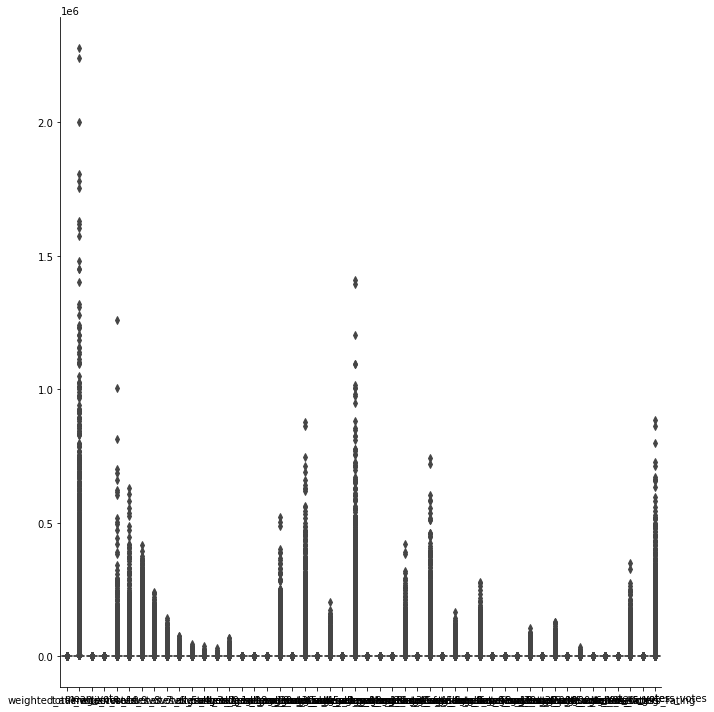

In [21]:
sns.catplot(data= df, kind ='box', height =10, aspect =1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9132cdcd10>,
      dtype=object)

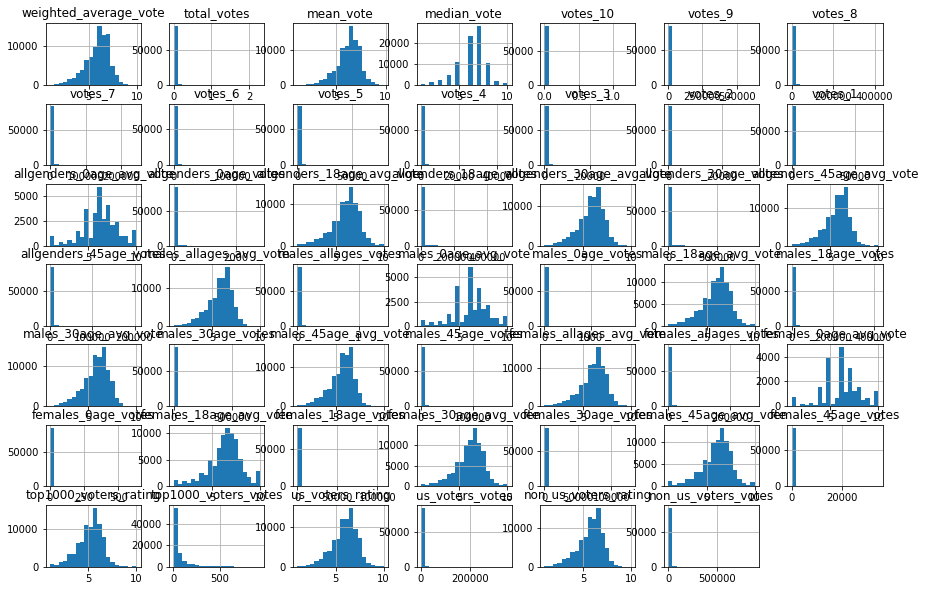

In [22]:
df.hist(figsize=(15,10), bins = 20, xlabelsize=10, ylabelsize=10)

Both of these above charts include a good amount of visual data but for some reason are skewed because of the spacing between graphs. Alot of the data ive checked for these assignments have been like this and im curious as to how to seperate so the data appears better.

In [ ]:
df.isnull().sum

<bound method DataFrame.sum of        imdb_title_id  ...  non_us_voters_votes
0              False  ...                False
1              False  ...                False
2              False  ...                False
3              False  ...                False
4              False  ...                False
...              ...  ...                  ...
85850          False  ...                False
85851          False  ...                False
85852          False  ...                False
85853          False  ...                False
85854          False  ...                False

[85855 rows x 49 columns]>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   imdb_title_id              85855 non-null  object 
 1   weighted_average_vote      85855 non-null  float64
 2   total_votes                85855 non-null  int64  
 3   mean_vote                  85855 non-null  float64
 4   median_vote                85855 non-null  float64
 5   votes_10                   85855 non-null  int64  
 6   votes_9                    85855 non-null  int64  
 7   votes_8                    85855 non-null  int64  
 8   votes_7                    85855 non-null  int64  
 9   votes_6                    85855 non-null  int64  
 10  votes_5                    85855 non-null  int64  
 11  votes_4                    85855 non-null  int64  
 12  votes_3                    85855 non-null  int64  
 13  votes_2                    85855 non-null  int

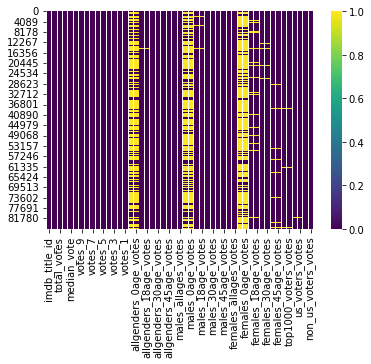

In [ ]:
sns.heatmap(df.isnull(),cbar=True,cmap='viridis')


Here within the heatmap, we can see the values allgender_0age_vots, male_0age_votes, and females_0age_votes. This missing data is due to the fact that no data exists for ages 0 voting on movies on Imdb. 

In [ ]:
num_col = ['allgenders_0age_votes', 'males_0age_votes', 'females_0age_votes']
for col in num_col:
    df[col]=pd.to_numeric(df[col])
    df[col].fillna(df[col].mean(), inplace=True)
df.head()

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,28,9,1,5,14,7.2,4.000000,6.0,38.0,5.7,50.0,6.6,35.0,6.2,97.0,7.0,1.000000,5.9,24.0,5.6,36.0,6.7,31.0,6.0,35.0,7.3,3.000000,5.9,14.0,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,103,28,20,13,16,6.0,1.000000,6.1,114.0,6.0,239.0,6.3,115.0,6.1,425.0,6.0,1.000000,6.2,102.0,6.0,210.0,6.2,100.0,6.2,50.0,NaN,4.842881,5.9,12.0,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,32,16,5,6,4,NaN,15.108097,5.5,25.0,5.8,72.0,6.2,62.0,5.9,146.0,NaN,12.436978,5.5,21.0,5.9,67.0,6.2,55.0,5.7,15.0,NaN,4.842881,5.8,4.0,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,117,63,26,25,16,NaN,15.108097,5.3,23.0,5.0,111.0,5.3,193.0,5.1,299.0,NaN,12.436978,5.2,20.0,4.9,96.0,5.2,171.0,5.9,39.0,NaN,4.842881,5.7,3.0,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,169,66,39,20,87,7.5,4.000000,7.0,402.0,7.0,895.0,7.1,482.0,7.0,1607.0,8.0,2.000000,7.0,346.0,7.0,804.0,7.0,396.0,7.2,215.0,7.0,2.000000,7.0,52.0,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


Here, using a helpful code I found online, i was able to make it useful for my data and add the entries that were missing above. I did this in hopes of altering the heat map above

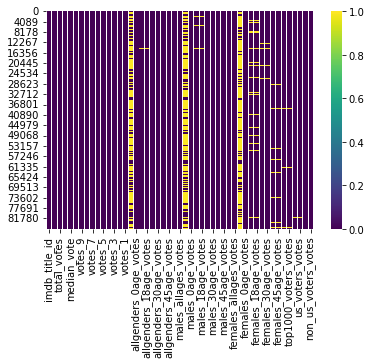

In [ ]:
sns.heatmap(df.isnull(),cbar=True,cmap='viridis')


here, i reprinted the heat map and you can see the bars have gotten shorter horizontally. Im not sure if that is the goal of the heat map but I believe this shows some change. If i could have that explained in person i feel itll help much more than some description online.

Text(0, 0.5, 'non_us_voters_rating')

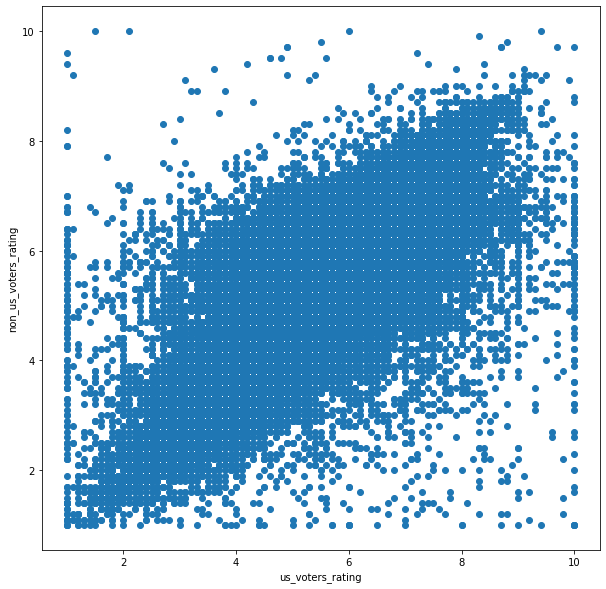

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x='us_voters_rating',y='non_us_voters_rating',data=df)
plt.xlabel('us_voters_rating')
plt.ylabel('non_us_voters_rating')

Okay so the more i look at this data, the more i notice how much of a clusterf**k this data set really is. However, i am learning alot about the practical uses of these datasets. On my next attempt, im going to find something much more managable so i can analyze it effectively. Here, i am looking at us voter rating versus non us voter rating and i can see the data has a moderate positive correalation however there are so many points plotted it really makes it difficult to get an accurate understanding of what i see. 

In [ ]:
df.describe()


,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
count,85855.000000,8.585500e+04,85855.000000,85855.000000,8.585500e+04,85855.000000,85855.000000,85855.000000,85855.000000,85855.000000,85855.000000,85855.000000,85855.000000,85855.000000,33359.000000,85855.000000,85149.000000,85149.000000,85845.000000,85845.000000,85775.000000,85775.000000,85854.000000,8.585400e+04,27411.000000,85855.000000,84390.000000,84390.000000,85843.000000,85843.000000,85754.000000,85754.000000,85774.000000,85774.000000,22117.000000,85855.000000,79334.000000,79334.000000,84911.000000,84911.000000,83057.000000,83057.000000,85176.000000,85176.000000,85646.000000,85646.000000,85854.000000,85854.000000
mean,5.898656,9.493490e+03,6.226342,6.267853,1.216158e+03,1196.774608,2040.896337,2105.668371,1353.192802,700.291177,340.179628,192.263409,126.663852,221.401479,6.195135,15.108097,6.011314,1778.370809,5.862917,4053.927124,5.678195,1260.706803,5.817172,6.029016e+03,6.221407,12.436978,5.946389,1343.226970,5.817767,3324.669338,5.630150,1051.196877,6.039408,1366.759461,6.147308,4.842881,6.321509,445.072340,6.071223,685.655451,6.022226,196.065341,5.155706,76.110231,5.925910,1647.822537,5.749638,4332.940865
std,1.234987,5.357436e+04,1.155280,1.481168,1.245582e+04,11735.363316,13801.122865,10699.375191,5976.801303,2931.301270,1415.815848,814.505546,551.690563,1172.132946,1.849155,46.136871,1.439783,11798.156167,1.279443,22087.819201,1.250633,5363.599259,1.248058,3.364652e+04,1.767590,32.021964,1.464165,9119.273345,1.289268,18348.499984,1.264053,4473.652738,1.346245,7672.675428,1.878342,8.143762,1.738922,2830.024831,1.454370,3732.376186,1.541895,842.979585,1.290920,124.264020,1.308087,8455.978158,1.285570,23243.807279
min,1.000000,9.900000e+01,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.200000,2.050000e+02,5.600000,6.000000,2.100000e+01,8.000000,18.000000,28.000000,30.000000,22.000000,12.000000,7.000000,5.000000,10.000000,5.000000,3.000000,5.300000,13.000000,5.100000,69.000000,5.000000,53.000000,5.100000,1.320000e+02,5.000000,5.000000,5.100000,9.000000,5.100000,56.000000,4.900000,45.000000,5.300000,22.000000,5.000000,4.842881,5.500000,4.000000,5.300000,10.000000,5.200000,6.000000,4.400000,11.000000,5.200000,24.000000,5.000000,95.000000
50%,6.100000,4.840000e+02,6.400000,6.000000,5.100000e+01,24.000000,49.000000,77.000000,76.000000,53.000000,30.000000,19.000000,14.000000,25.000000,6.000000,15.108097,6.200000,43.000000,6.100000,172.000000,5.900000,123.000000,6.000000,3.080000e+02,6.000000,12.436978,6.200000,31.000000,6.000000,140.000000,5.900000,104.000000,6.300000,58.000000,6.000000,4.842881,6.500000,11.000000,6.300000,27.000000,6.200000,16.000000,5.300000,29.000000,6.100000,81.000000,6.000000,225.000000
75%,6.800000,1.766500e+03,7.000000,7.000000,1.920000e+02,111.500000,234.000000,342.000000,29

Here, you can see the actual statistics of the data and seeing this has me wondering. If this is alot of data, what would someone in this feild actually be analyzing? And if you had this much data how would you manage it? 